In [1]:
import subprocess; subprocess.check_call(["latex", "-help"])

FileNotFoundError: [Errno 2] No such file or directory: 'latex'

In [2]:
# %matplotlib inline

In [3]:
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
import matplotlib.pyplot as plt

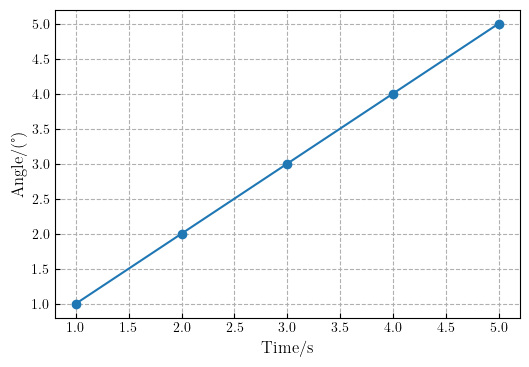

In [8]:
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.figsize': (6.0, 4.0),
    'font.size': 14.0,
    'axes.labelsize': 12.0,
    'axes.linewidth': 0.8,
    'axes.grid': False,
    'xtick.labelsize': 10.0,
    'ytick.labelsize': 10.0,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'legend.fontsize': 14.0,
})

x = [1,2,3,4,5]
y = x
fig = plt.figure()
# fig.set_size_inches(w=4.7747, h=3.5)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x, y, '-o')
plt.grid(linestyle="--")                   
plt.xlabel("Time/s")
plt.ylabel("Angle/(°)")
# plt.show()
plt.savefig('test.pgf')

### Time corruption experiment

In [2]:
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

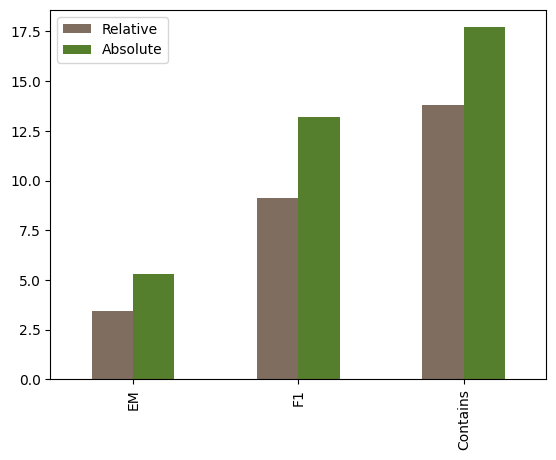

In [12]:
import pandas as pd
import tikzplotlib

# Prepare simple plot
df = pd.DataFrame({
     'Relative': [3.43,9.11,13.82],
     'Absolute': [5.32,13.20,17.70],
     }, index= ['EM', 'F1', 'Contains'])

hist = df.plot(kind="bar", xlabel='', ylabel='', color=['#7f6d5f', '#557f2d'])

tikzplotlib_fix_ncols(hist)
tikzplotlib.save("figures/absolute_relative_reference.tex")

/home/wallat/.conda/envs/temp/lib/python3.9/site-packages/tikzplotlib/_hatches.py:65: UserWarning: tikzplotlib: Hatch '////' cannot be rendered. Only single character hatches are supported, e.g., {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Hatch '/' will be used.
  warnings.warn(


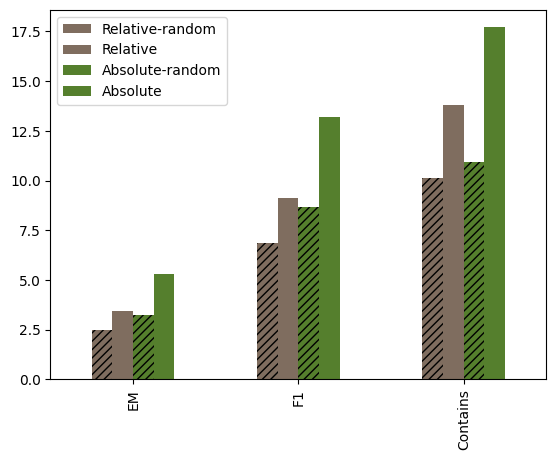

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import tikzplotlib

df = pd.DataFrame({
     'Relative-random': [2.50,6.87,10.12],
     'Relative': [3.43,9.11,13.82],
     'Absolute-random': [3.24,8.66,10.93],
     'Absolute': [5.32,13.20,17.70],
     }, index= ['EM', 'F1', 'Contains'])

hist = df.plot(kind="bar", xlabel='', ylabel='', color=['#7f6d5f', '#7f6d5f', '#557f2d', '#557f2d'])


texture_pattern = '////'  # Customize the pattern

bar_container = hist.containers[0]
for bar in bar_container.patches:
    bar.set_hatch(texture_pattern)

bar_container = hist.containers[2]
for bar in bar_container.patches:
    bar.set_hatch(texture_pattern)

# Retrieve the first bar from the container
# bar = bar_container.patches[0]
# bar.set_hatch(texture_pattern)

# Add texture to the bar
# hist.legend(handles[])
# plt.show()

tikzplotlib_fix_ncols(hist)
tikzplotlib.save("figures/absolute_relative_random_reference.tex")

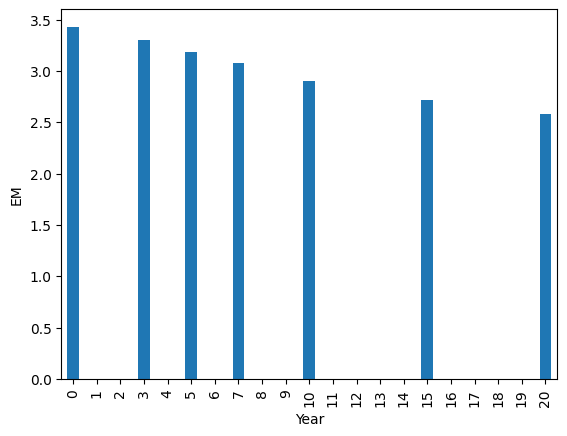

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import tikzplotlib

# offset by years in EM
years = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
ems = [3.428,0,0,3.303,0,3.181,0,3.081,0,0,2.901,0,0,0,0,2.713,0,0,0,0,2.58]
# contains = [13.822,0,0,13.222,0,12.809,0,12.473,0,0,11.854,0,0,0,0,11.069,0,0,0,0,10.512]

df = pd.DataFrame(list(zip(years, ems)),
               columns =['Year', 'EM'])
df.head()
# df = pd.DataFrame({
#      'Relative-random': [2.50,6.87,10.12],
#      'Relative': [3.43,9.11,13.82],
#      'Absolute-random': [3.24,8.66,10.93],
#      'Absolute': [5.32,13.20,17.70],
#      }, index= ['EM', 'F1', 'Contains'])

hist = df.plot(kind="bar", x='Year', y="EM", legend=False, ylabel="EM")

# df['MA'] = df['EM'].rolling(window=5).mean()
# plt.plot(years, df['MA'])

# plt.show()

# tikzplotlib_fix_ncols(hist)
# tikzplotlib.save("figures/relative_corruption_over_years.tex")

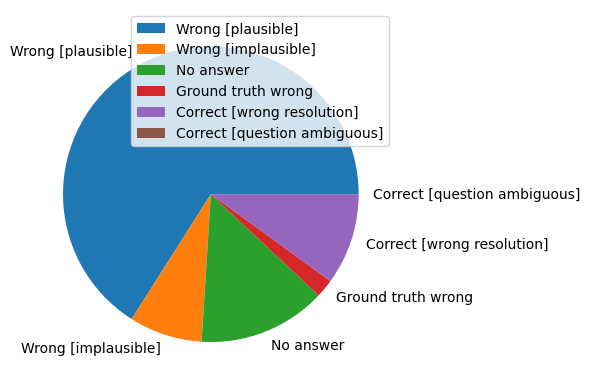

In [16]:
# Pie charts pgf

import matplotlib.pyplot as plt
import numpy as np

y = np.array([33, 4, 7, 1, 5, 0])
mylabels = ["Wrong [plausible]", "Wrong [implausible]", "No answer", "Ground truth wrong", "Correct [wrong resolution]", "Correct [question ambiguous]"]

plot = plt.pie(y, labels=mylabels)
plot = plt.legend()


tikzplotlib_fix_ncols(plot)
tikzplotlib.save("figures/manual_analysis.tex")
# plt.show() 